# 손글씨 숫자 인식
- 8x8 픽셀 숫자 데이터 5620개 사용

In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [11]:
digits.data[0].shape

(64,)

In [12]:
digits.images[0].shape

(8, 8)

In [10]:
digits.target[0]

0

In [13]:
digits.target_names[0]

0

In [14]:
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names.shape)

(1797, 64)
(1797, 8, 8)
(1797,)
(10,)


In [15]:
digits.data[9]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [16]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

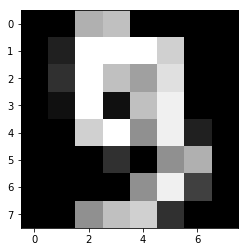

In [19]:
plt.imshow(digits.images[9], cmap='gray')

In [20]:
digits.data.max(), digits.data.min()

(16.0, 0.0)

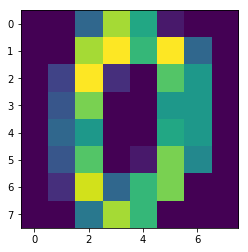

In [21]:
plt.imshow(digits.images[0])

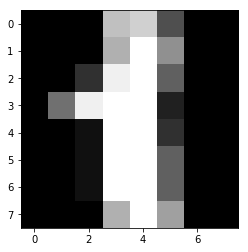

In [28]:
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [24]:
digits.data.shape

(1797, 64)

In [25]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
digits.images.shape

(1797, 8, 8)

In [27]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색 ( 0 ~ 16 ?)
print(digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [29]:
digits.target[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

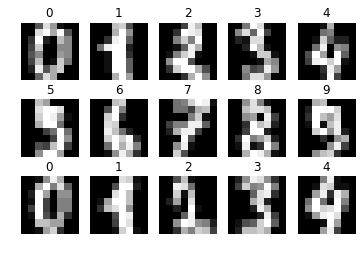

In [30]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [31]:
x = digits.images
x = x.reshape((-1, 64))    # same data as digits.data 

# x[0]
# x[0] == digits.data[0]

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
import numpy as np

# np.random.seed(42)
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.94


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Persistance:
- joblib.dump() and joblib.load() provide a replacement for pickle to work efficiently on arbitrary Python objects containing large data, in particular large numpy arrays.

In [32]:
# 학습한 데이터 (object) 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [33]:
def predict_digit(filename):
    model = joblib.load("digits.pkl")  # 학습한 데이터 읽어 들이기
    
    my_img = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    my_img = cv2.resize(my_img, (8, 8))
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    # my_img = 15 - my_img // 16      # // is floor division (7//2=3, -7//2=-4)
    my_img = 15 - (my_img // 16)
    # 흑백 반전
    plt.imshow(my_img, cmap="gray")
    plt.show()
    
    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

In [34]:
# !dir *.png

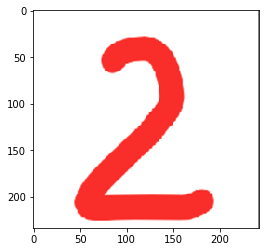

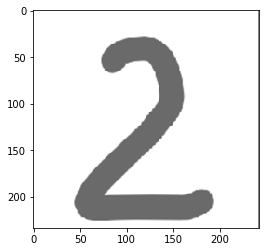

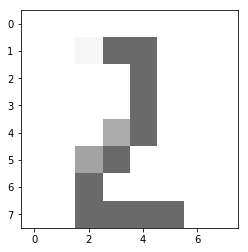

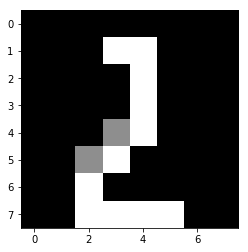

digit2.png = 2


In [35]:
# 이미지 파일을 지정해서 실행하기
# 미리보기에서 클립보드에서 파일로 저장 실행
# 이미지 그리기도 미리보기에서 가능함
img = cv2.imread("digit2_2.png")
n = predict_digit("digit2_2.png")
print("digit2.png = " + str(n))

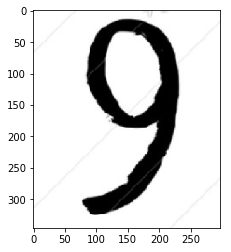

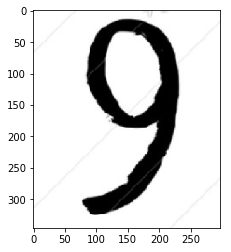

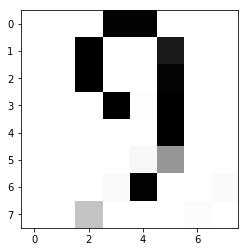

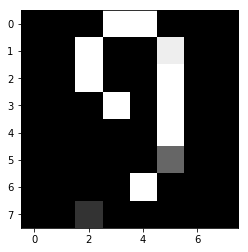

digit9.png = 9


In [36]:
img = cv2.imread("digit9_3.png")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9_3.png")
print("digit9.png = " + str(n))
plt.show()

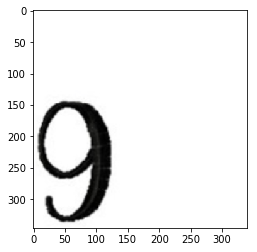

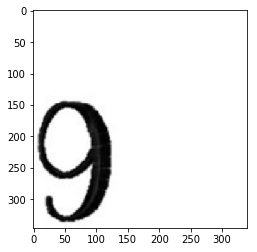

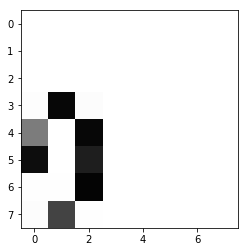

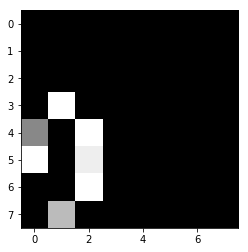

digit9_2.png = 6


In [48]:
img = cv2.imread("digit9_4.png")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9_4.png")
print("digit9_2.png = " + str(n))
plt.show()

In [49]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 264E-2F1C

 C:\Users\rta_note\Desktop\Lab_M34 디렉터리

2019-11-27  오후 04:23    <DIR>          .
2019-11-27  오후 04:23    <DIR>          ..
2019-10-24  오전 10:04    <DIR>          .ipynb_checkpoints
2019-07-20  오후 01:21             3,258 baseline-script.csv
2019-07-21  오후 07:28           659,240 bike_train.csv
2019-10-24  오전 10:03        68,606,236 cats_and_dogs_filtered.zip
2019-07-20  오후 01:17             5,221 decision-tree.dot
2019-08-05  오후 06:13             8,587 digit2.png
2019-08-05  오후 06:20             9,344 digit2_2.png
2019-08-05  오후 06:13             7,431 digit9.png
2019-08-05  오후 06:14             8,408 digit9_2.png
2019-08-05  오후 06:21            33,284 digit9_3.png
2019-08-05  오후 06:21            24,365 digit9_4.png
2019-11-27  오후 04:13             6,067 digits.pkl
2019-11-27  오후 03:52         5,904,182 face-detect.png
2019-11-27  오후 03:52            59,559 face-pickup.png
2019-11-27  오후 03:32         1,774,696 families.jpg
2019-07-20  오전 1